# TITANIC SURVIVAL PREDICTION

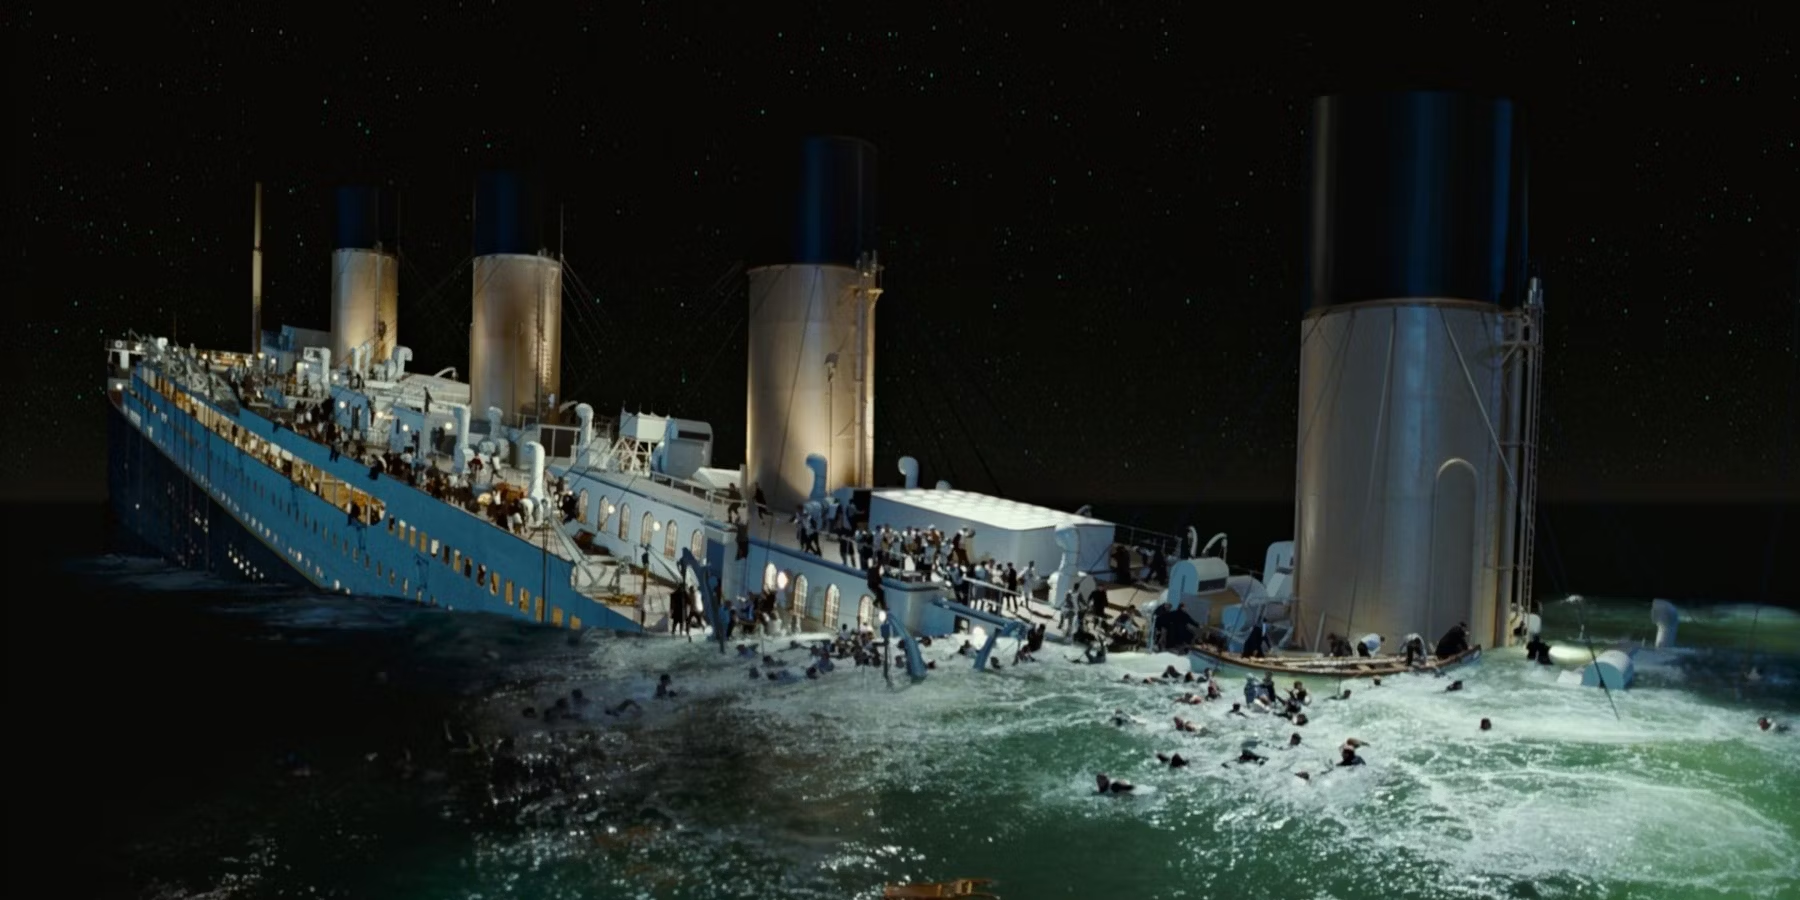

## **ABOUT THE AUTHOR**

Hi there! I'm Akshay Shekade, a data scientist in training. I'm diving into the world of data science and exploring various concepts and techniques to enhance my skills. Join me on this exciting journey as we learn and grow in the field of data science together. 

> "Community is the heart of growth and learning. Together, we can achieve more than we ever could alone."

| Name               | Email                                               | LinkedIn                                                  | GitHub                                           | Kaggle                                      |
|--------------------|-----------------------------------------------------|-----------------------------------------------------------|--------------------------------------------------|-----------------------------------------------|
| **Akshay Shekade**      |akshayshekade757@gmail.com  | [![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-%23000000.svg?style=for-the-badge&logo=LinkedIn&logoColor=white)](https://www.linkedin.com/in/akshay-shekade-a225a8135/)  | [![GitHub Badge](https://img.shields.io/badge/GitHub-%23000000.svg?style=for-the-badge&logo=GitHub&logoColor=white)](https://github.com/AkshayShekade)  | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-%23000000.svg?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/akshayshekade)  |

> **LETS BEGIN** :)

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Reading the dataset**

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Brief overview of each column**

- **PassengerId:** A unique identifier for each passenger.
- **Survived:** This column likely indicates whether the passenger survived or not (1 for survived, 0 for not survived).
- **Pclass:** The passenger's ticket class (1st, 2nd, or 3rd class).
- **Name:** The passenger's name.
- **Sex:** The gender of the passenger.
- **Age:** The age of the passenger.
- **SibSp:** The number of siblings/spouses aboard the Titanic.
- **Parch:** The number of parents/children aboard the Titanic.
- **Ticket:** The ticket number.
- **Fare:** The fare paid by the passenger.
- **Cabin:** The cabin number.
- **Embarked:** The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton).

**Information about dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Basic statistics of the dataset**

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


**Checking null values**

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

_**We can see that except for the above mentioned missing values, no NaN values exist.**_

In [6]:
(df.isnull().sum() / df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**Observations till now**

* **There are a total of `891` passengers in our dataset.**
* **The Age feature is missing approximately `19.8%` of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.** 
* **The Cabin feature is missing approximately `77.1%` of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.**
* **The Embarked feature is missing `0.22%` of its values, which should be relatively harmless.**

**Dropping unwanted column**

In [7]:
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Why to drop these columns ?
The columns 'PassengerId', 'Name', 'Cabin', and 'Ticket' are being dropped from the Dataset for potential reasons outlined below:

- 'PassengerId': This column appears to be an identifier assigned to each passenger. It is typically a unique value for each passenger and does not provide any meaningful information for analysis or modeling. Therefore, it is commonly dropped as it does not contribute to the analysis.

- 'Name': The 'Name' column contains the names of the passengers. While names can provide valuable information in certain scenarios (e.g., analyzing name prefixes or titles), in this case, they may not be directly relevant to the analysis or modeling task at hand. Hence, it is often dropped to simplify the DataFrame.

- 'Cabin': The 'Cabin' column represents the cabin category or number assigned to each passenger. However, it has a large number of missing values (as identified earlier). Additionally, the cabin information may not be directly relevant to the analysis or prediction of the target variable. Hence, it is commonly dropped to reduce complexity and handle the missing values.

- 'Ticket': The 'Ticket' column contains the ticket numbers of the passengers. Ticket numbers alone may not provide significant insights into the analysis or modeling process, unless there is a specific requirement to investigate ticket patterns or correlations. Therefore, it is often dropped to simplify the DataFrame and focus on more relevant features.

**Filling null values**

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

**Separate categorical and numerical columns**

In [9]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns is :", cat_cols)

num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
print(f"Numerical columns is :", num_cols)

Categorical columns is : ['Sex', 'Embarked']
Numerical columns is : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


**Checking unique values in categorical columns**

In [10]:
for i in cat_cols:
    print(f"Column name =,'{i}'")
    print(f"Total unique values = {df[i].nunique()}")
    print("__" * 30)

Column name =,'Sex'
Total unique values = 2
____________________________________________________________
Column name =,'Embarked'
Total unique values = 3
____________________________________________________________


## DATA VISUALIZATION

> **Gender distribution**

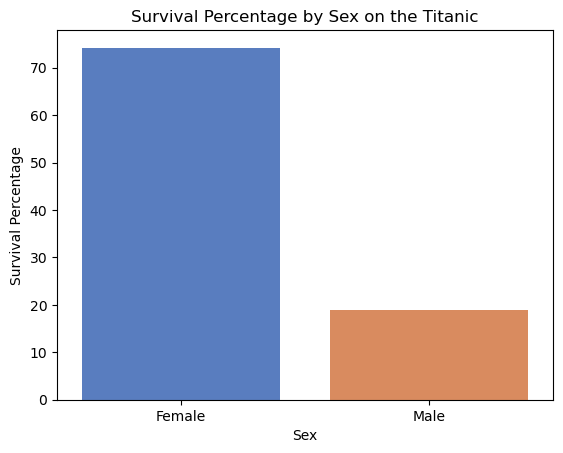

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


In [11]:
survived_by_sex = df.groupby('Sex')['Survived'].mean() * 100

sns.barplot(x = survived_by_sex.index, y = survived_by_sex.values, palette = 'muted' )
plt.xlabel('Sex')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage by Sex on the Titanic')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()


print("Percentage of females who survived:", df["Survived"][df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df["Survived"][df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

- **The analysis reveals a stark contrast in survival rates between genders among Titanic passengers. Approximately `74.20%` of females survived the disaster, significantly higher than the survival rate among males, which stood at a mere `18.89%`.**
- **This discrepancy underscores the priority given to women and children during the evacuation process, reflecting the societal norms and values of the time. Despite facing a life-threatening crisis, the data suggests that a greater proportion of females were able to secure a place on lifeboats or otherwise survive the sinking of the Titanic compared to their male counterparts.**

> **Pclass distribution**

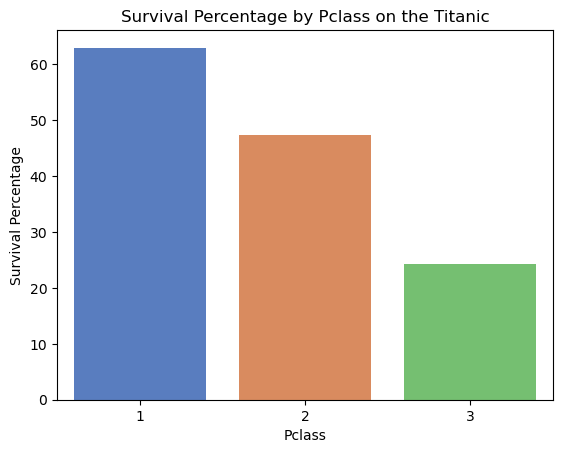

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


In [12]:
survived_by_group = df.groupby('Pclass')['Survived'].mean() * 100

sns.barplot(x=survived_by_group.index, y=survived_by_group.values, palette='muted')

plt.xlabel('Pclass')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage by Pclass on the Titanic')
plt.xticks()
plt.show()

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

- **The analysis indicates notable disparities in survival rates across different passenger classes aboard the Titanic.** 
- **first-class passengers (Pclass = 1), approximately `62.96%` survived, showcasing a relatively higher likelihood of survival compared to passengers in lower classes.**
- **Second-class passengers (Pclass = 2) had a lower survival rate of `47.28%`, indicating a decrease in survival likelihood compared to first-class passengers.**
- **Third-class passengers (Pclass = 3) experienced the lowest survival rate, with only `24.23%` surviving the disaster.**
- **This discrepancy suggests a potential correlation between passenger class and access to life-saving resources or evacuation priorities during the Titanic's tragic sinking.**

> **Age distribution**

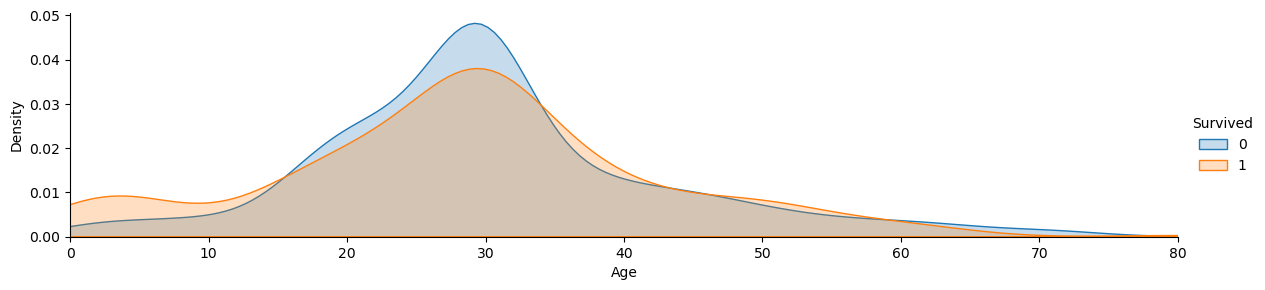

In [13]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.show()

> **SibSp distribution**

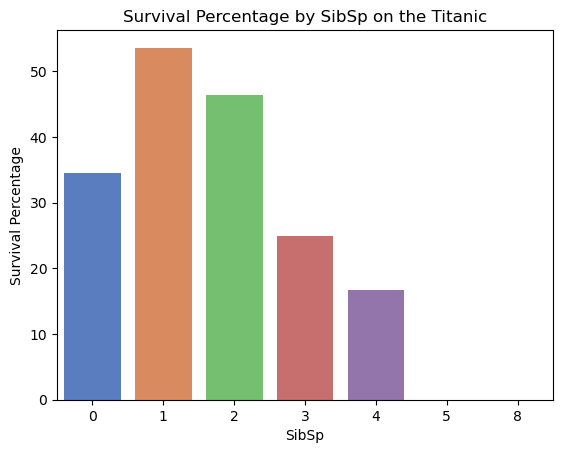

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664


In [14]:
survived_by_sibsp = df.groupby('SibSp')['Survived'].mean() * 100

sns.barplot(x=survived_by_sibsp.index, y=survived_by_sibsp.values, palette='muted')

plt.xlabel('SibSp')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage by SibSp on the Titanic')
plt.xticks()
plt.show()


print("Percentage of SibSp = 0 who survived:", df["Survived"][df["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df["Survived"][df["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 3 who survived:", df["Survived"][df["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 4 who survived:", df["Survived"][df["SibSp"] == 4].value_counts(normalize = True)[1]*100)


- **The analysis illustrates how the presence of siblings or spouses (SibSp) aboard the Titanic correlates with survival rates.**
- **Passengers with no siblings or spouses (SibSp = 0) had a survival rate of approximately `34.54%`, while those with one sibling or spouse (SibSp = 1) had a higher survival rate of `53.59%`.**
- **However, the survival rates declined for passengers with larger numbers of siblings or spouses, with rates decreasing to `46.43% `for SibSp = 2, `25.00%` for SibSp = 3, and `16.67%` for SibSp = 4.**
- **Notably, passengers with SibSp = 5 or 8 had `no survivors` in the dataset, indicating that larger family sizes might have faced greater challenges during the evacuation process.**
- **This analysis suggests a potential relationship between the number of siblings or spouses and survival likelihood, possibly influenced by factors such as family cohesion, assistance, or access to lifeboats.**

> **Parch distribution**

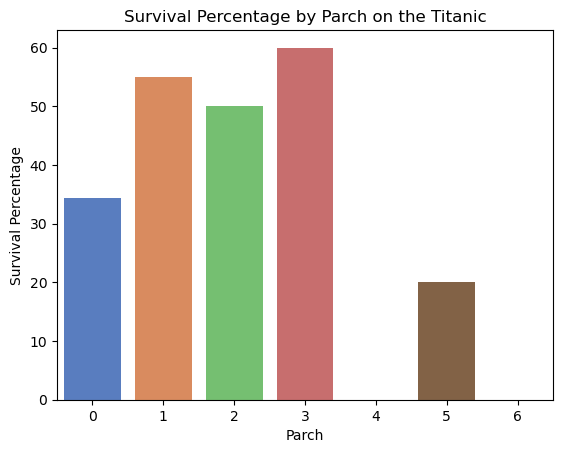

Percentage of Parch = 0 who survived: 34.365781710914455
Percentage of Parch = 1 who survived: 55.08474576271186
Percentage of Parch = 2 who survived: 50.0
Percentage of Parch = 3 who survived: 60.0
Percentage of Parch = 5 who survived: 20.0


In [15]:
survived_by_parch = df.groupby('Parch')['Survived'].mean() * 100

sns.barplot(x=survived_by_parch.index, y=survived_by_parch.values, palette='muted')

plt.xlabel('Parch')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage by Parch on the Titanic')
plt.xticks()
plt.show()

print("Percentage of Parch = 0 who survived:", df["Survived"][df["Parch"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of Parch = 1 who survived:", df["Survived"][df["Parch"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Parch = 2 who survived:", df["Survived"][df["Parch"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Parch = 3 who survived:", df["Survived"][df["Parch"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of Parch = 5 who survived:", df["Survived"][df["Parch"] == 5].value_counts(normalize = True)[1]*100)


- **The analysis explores the relationship between the number of parents or children (Parch) accompanying passengers on the Titanic and their respective survival rates.**
- **Passengers with no parents or children aboard (Parch = 0) had a survival rate of approximately `34.37%`. However, the survival rates increased for passengers accompanied by one or two parents or children, reaching `55.08%` for Parch = 1 and `50.00%` for Parch = 2.**
- **Notably, the survival rate further increased for passengers with three parents or children (Parch = 3), reaching `60.00%`. However, `no survivors` were recorded among passengers with four or six parents or children (Parch = 4 and Parch = 6), while only `20.00%` survived among those with five parents or children (Parch = 5).**
- **This analysis suggests that the presence of a moderate number of parents or children may have positively impacted survival rates, possibly due to assistance or support during the evacuation process, while extreme family sizes may have faced greater challenges or limitations.**

> **Embarked distribution**

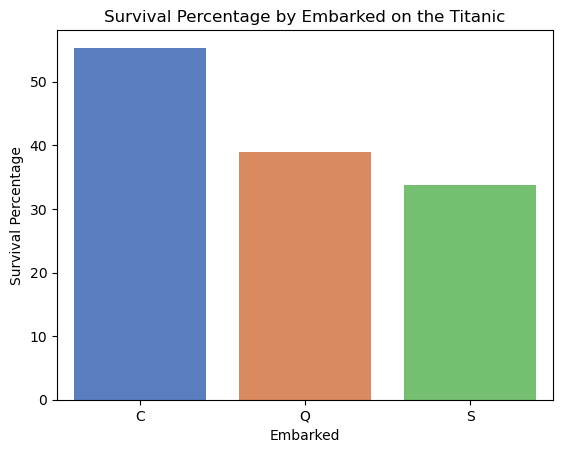

Percentage of Embarked = Cherbourg who survived: 55.35714285714286
Percentage of Embarked = Queenstown who survived: 38.961038961038966
Percentage of Embarked = Southampton who survived: 33.69565217391305


In [16]:
survived_by_parch = df.groupby('Embarked')['Survived'].mean() * 100

sns.barplot(x=survived_by_parch.index, y=survived_by_parch.values, palette='muted')

plt.xlabel('Embarked')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage by Embarked on the Titanic')
plt.xticks()
plt.show()

print("Percentage of Embarked = Cherbourg who survived:", df["Survived"][df["Embarked"] == 'C'].
      value_counts(normalize = True)[1]*100)
print("Percentage of Embarked = Queenstown who survived:", df["Survived"][df["Embarked"] == 'Q'].
      value_counts(normalize = True)[1]*100)
print("Percentage of Embarked = Southampton who survived:", df["Survived"][df["Embarked"] == 'S'].
      value_counts(normalize = True)[1]*100)

- **The analysis delves into the correlation between the port of embarkation (Cherbourg, Queenstown, Southampton) and the corresponding survival rates of Titanic passengers.**
- **Passengers embarking from `Cherbourg` exhibited the highest survival rate at approximately `55.36%`. In contrast, those embarking from `Queenstown` had a slightly lower survival rate of `38.96%`.**
- **Passengers embarking from `Southampton` had the lowest survival rate at `33.70%`.** 
- **This discrepancy in survival rates based on the port of embarkation may suggest variations in factors such as passenger demographics, accommodations, or boarding procedures, potentially influencing the access to life-saving resources or the order of evacuation during the Titanic's tragic sinking.**

## DATA PRE-PROCESSING:

In [17]:
sex = pd.get_dummies(df["Sex"], drop_first=True)

# Display the first few rows of the resulting DataFrame 'sex'
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [18]:
embark = pd.get_dummies(df["Embarked"], drop_first=True)

# Display the first few rows of the resulting DataFrame 'embark'
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [19]:
pclass = pd.get_dummies(df["Pclass"], drop_first=True)

# Display the first few rows of the resulting DataFrame 'pclass'
pclass.head()

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


### Why dummy variable are used for these columns ?
Creating dummy variables is a common technique used to handle categorical variables in machine learning models. Dummy variables are used for certain columns, such as 'Sex', 'Embarked', and 'Pclass', for the following reasons:

- 'Sex' column: The 'Sex' column typically represents gender, which is a categorical variable with two possible values, such as 'Male' and 'Female'. By creating dummy variables for the 'Sex' column, each unique category is transformed into a separate binary variable. For example, if 'Sex' is transformed into a dummy variable called 'Sex_Male', it would take the value 1 if the passenger is male and 0 otherwise. This allows machine learning algorithms to capture any gender-related patterns or effects in the data.

- 'Embarked' column: The 'Embarked' column represents the port of embarkation, which is also a categorical variable with multiple possible values, such as 'C' (Cherbourg), 'Q' (Queenstown), and 'S' (Southampton). By creating dummy variables for 'Embarked', each unique category is transformed into a separate binary variable. For example, if 'Embarked' is transformed into dummy variables called 'Embarked_Q' and 'Embarked_S', they would take the value 1 if the passenger embarked from Queenstown or Southampton, respectively, and 0 otherwise. This allows the model to capture any potential effects related to the port of embarkation.

- 'Pclass' column: The 'Pclass' column represents the passenger class, which is an ordered categorical variable with multiple levels, such as 1st, 2nd, and 3rd class. By creating dummy variables for 'Pclass' and dropping the first dummy variable, we remove any unintended ordinal relationship between the levels. This ensures that each class is represented by a separate binary variable (e.g., 'Pclass_2' and 'Pclass_3'), allowing the model to capture the specific effects associated with each passenger class.

By using dummy variables for these columns, we transform categorical variables into numerical representations that can be effectively utilized by machine learning algorithms. This enables the algorithms to incorporate these categorical features in the model and capture any patterns or effects associated with different categories or levels within the variables.

In [20]:
df.drop(["Sex", "Embarked", "Pclass"], axis=1, inplace=True)

In [21]:
data = pd.concat([df, sex, embark, pclass], axis=1)

# Converting the column names to string data type
# using the astype() function on the column names of the DataFrame 'data'
# The astype() function is called with the parameter 'str' to convert the data type to string
data.columns = data.columns.astype(str)

# Displaying the first few rows of the updated DataFrame 'data'
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


In [22]:
data['male'] = data['male'].astype('int')
data['Q'] = data['Q'].astype('int')
data['S'] = data['S'].astype('int')
data['2'] = data['2'].astype('int')
data['3'] = data['3'].astype('int')

In [23]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


#### **Final Columns Description**

- 'Survived': This is the target variable or the variable we want to predict. It represents whether a passenger survived (1) or did not survive (0).

- 'Age': This variable represents the age of the passenger.

- 'SibSp': This variable represents the number of siblings/spouses the passenger had aboard the Titanic.

- 'Parch': This variable represents the number of parents/children the passenger had aboard the Titanic.

- 'Fare': This variable represents the fare or the amount of money spent on the ticket.

- 'male': This variable is a binary variable indicating the gender of the passenger. It takes the value 1 if the passenger is male and 0 if the passenger is female.

- 'Q': This variable is a binary variable indicating whether the passenger embarked from Queenstown (1) or not (0).

- 'S': This variable is a binary variable indicating whether the passenger embarked from Southampton (1) or not (0).

- '2': This variable is a binary variable indicating whether the passenger belongs to the second passenger class (1) or not (0).

- '3': This variable is a binary variable indicating whether the passenger belongs to the third passenger class (1) or not (0).

# TRAINING MODEL

In [24]:
from sklearn.linear_model import LogisticRegression     # Import the LogisticRegression class for logistic regression
from sklearn.model_selection import train_test_split    # Import the train_test_split function for splitting data
from sklearn.metrics import confusion_matrix    # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report   # Import the classification_report function for detailed classification metrics
from sklearn.neighbors import KNeighborsClassifier  # Import the KNeighborsClassifier class for k-nearest neighbors classification
from sklearn.tree import DecisionTreeClassifier     # Import the DecisionTreeClassifier class for decision tree classification
from sklearn.ensemble import RandomForestClassifier     # Import the RandomForestClassifier class for random forest classification
from sklearn.naive_bayes import GaussianNB      # Import the GaussianNB class for Gaussian naive Bayes classification
from sklearn.svm import SVC     # Import the SVC class for support vector machine classification

In [25]:
X = data.drop("Survived", axis=1)

# Creating the target variable Y by assigning the "Survived" column from the DataFrame 'data' to Y
# The result is assigned to the variable Y
Y = data["Survived"]

In [26]:
Y.shape

(891,)

In [27]:
np.unique(Y)

array([0, 1], dtype=int64)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Testing Different Models:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Decision Tree Classifier
- Random Forest Classifier
- Gaussian Naive Bayes Classifier
- Support Vector Machines

> **Logistic Regression**

In [29]:
log_reg = LogisticRegression(max_iter=1000, C=0.1)

log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

**Testing accuracy of Logistic Regression**

In [30]:
log_reg.score(X_test, y_test)

0.8097014925373134

**Training accuracy of Logistic Regression**

In [31]:
log_reg.score(X_train, y_train)

0.8186195826645265

**Confusion Matrix of Logistic Regression**

In [32]:
y_predict_lr = log_reg.predict(X_test)

confusion_matrix(y_test, y_predict_lr)

array([[140,  17],
       [ 34,  77]], dtype=int64)

**Classification Report of Logistic Regression**

In [33]:
print(classification_report(y_test, y_predict_lr))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.82      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



> **KNN Classifier**

In [34]:
knn = KNeighborsClassifier(n_neighbors = 13)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

**Testing Accuracy of KNN Classifier**

In [35]:
knn.score(X_test,y_test)

0.7052238805970149

**Training Accuracy of KNN Classifier**

In [36]:
knn.score(X_train,y_train)

0.7479935794542536

**Confusion Matrix of KNN Classifier**

In [37]:
y_predict_kn = knn.predict(X_test)

confusion_matrix(y_test,y_predict_kn)

array([[136,  21],
       [ 58,  53]], dtype=int64)

**Classification Report of KNN Classifier**

In [38]:
print(classification_report(y_test,y_predict_kn))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77       157
           1       0.72      0.48      0.57       111

    accuracy                           0.71       268
   macro avg       0.71      0.67      0.67       268
weighted avg       0.71      0.71      0.69       268



> **Decision Tree Classifier**

In [39]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

**Testing Accuracy of Decision Tree Classifier**

In [40]:
decision_tree.score(X_train,y_train)

0.9807383627608347

**Training Accuracy of Decision Tree Classifier**

In [41]:
decision_tree.score(X_test,y_test)

0.7425373134328358

**Confusion Matrix of Decision Tree Classifier**

In [42]:
y_predict_dt = decision_tree.predict(X_test)

confusion_matrix(y_test,y_predict_dt)

array([[123,  34],
       [ 35,  76]], dtype=int64)

**Classification Report of Decision Tree Classifier**

In [43]:
print(classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       157
           1       0.69      0.68      0.69       111

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



> **Random Forest Classifier**

In [44]:
random_forest = RandomForestClassifier(n_estimators=13)

random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=13)

**Training Accuracy of Random Forest Classifier**

In [45]:
random_forest.score(X_train,y_train)

0.9759229534510433

**Testing Accuracy of Random Forest Classifier**

In [46]:
random_forest.score(X_test,y_test)

0.7574626865671642

**Confusion Matrix Random Forest Classifier**

In [47]:
y_predict_rf = random_forest.predict(X_test)

confusion_matrix(y_test,y_predict_rf)

array([[125,  32],
       [ 33,  78]], dtype=int64)

**Classification Report Random Forest Classifier**

In [48]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       157
           1       0.71      0.70      0.71       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



> **Gaussian Naive Bayes Classifier**

In [49]:
naive_bayes = GaussianNB()

naive_bayes.fit(X_train,y_train)

GaussianNB()

**Training Accuracy of Gaussian Naive Bayes Classifier**

In [50]:
naive_bayes.score(X_train,y_train)

0.8057784911717496

**Testing Accuracy of Gaussian Naive Bayes Classifier**

In [51]:
naive_bayes.score(X_test,y_test)

0.7835820895522388

**Confusion Matrix of Gaussian Naive Bayes Classifier**

In [52]:
y_predict_nb = naive_bayes.predict(X_test)

confusion_matrix(y_test,y_predict_nb)

array([[128,  29],
       [ 29,  82]], dtype=int64)

**Classification Report of Gaussian Naive Bayes Classifier**

In [53]:
print(classification_report(y_test,y_predict_nb))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       157
           1       0.74      0.74      0.74       111

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



> **SVM Classifier**

In [54]:
svm = SVC()

svm.fit(X_train,y_train)

SVC()

**Testing Accuracy of SVM Classifier**

In [55]:
svm.score(X_test,y_test)

0.664179104477612

**Training Accuracy of SVM Classifier**

In [56]:
svm.score(X_train,y_train)

0.6677367576243981

**Confusion Matrix of SVM Classifier**

In [57]:
y_predict_sv = svm.predict(X_test)

confusion_matrix(y_test,y_predict_sv)

array([[149,   8],
       [ 82,  29]], dtype=int64)

**Classification Report of SVM Classifier**

In [58]:
print(classification_report(y_test,y_predict_sv))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77       157
           1       0.78      0.26      0.39       111

    accuracy                           0.66       268
   macro avg       0.71      0.61      0.58       268
weighted avg       0.70      0.66      0.61       268



- Thank you so much for taking the time to explore this notebook with me. Your support means the world to me, and I couldn't have come this far without it. As I continue my journey in data science and machine learning, I humbly ask for your continued support and encouragement.🚀💫